#### Christian Altrichter, Jury Andrea D'Onofrio, Francesco Huber

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(4,suppress=True)

## Task 1.
Get the image coordinates xi , i = 1, . . . , 10, of the points marked in the image from the second part
of the project in “house1.png” and the image coordinates x′i, i = 1, . . . , 10, of the same points in “house2.png”
and use the 8-point algorithm to reconstruct the fundamental matrix F relating the two views.

In [16]:
def plot_points(image, points, title=''):
    fig, ax = plt.subplots()
    ax.imshow(image)
    for i, point in enumerate(points):
        ax.scatter(point[0],point[1],color="red", label=i+1, marker='.')
        plt.text(point[0],point[1], s=i+1, color='white', size= 'medium')
    plt.title(title)
    plt.figure(figsize=(13,13))
    plt.show()

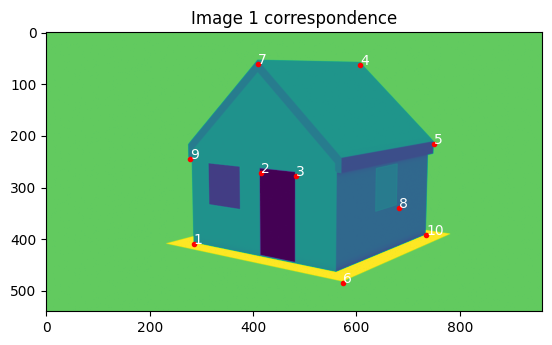

<Figure size 1300x1300 with 0 Axes>

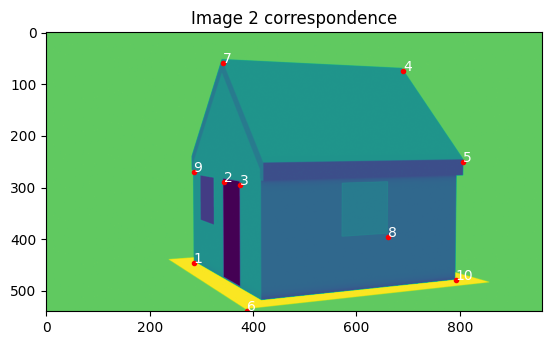

<Figure size 1300x1300 with 0 Axes>

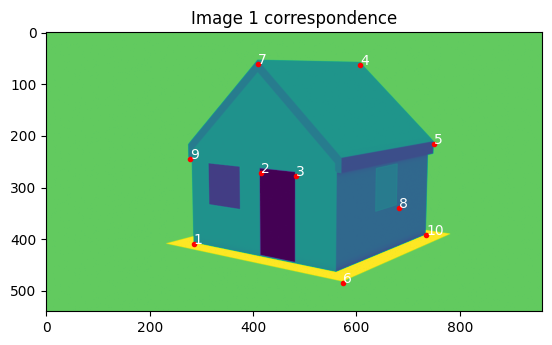

<Figure size 1300x1300 with 0 Axes>

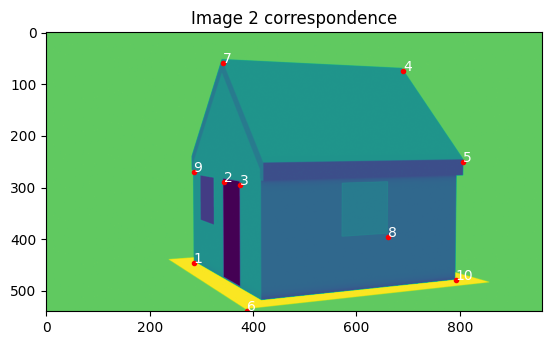

<Figure size 1300x1300 with 0 Axes>

In [17]:
image1_points = [[285, 410], #1
                 [415, 271], #2
                 [483, 277], #3
                 [608, 62],  #4
                 [750, 215], #5
                 [575, 485], #6
                 [410, 60],  #7
                 [682, 340], #8
                 [278, 245], #9
                 [735, 392]] #10

plot_points(cv2.imread("house1.png", 0), image1_points, "Image 1 correspondence")

image2_points = [[285, 446], #1
                 [344, 290], #2
                 [375, 295], #3
                 [690, 75],  #4
                 [806, 251], #5
                 [388, 538], #6
                 [341, 59],  #7
                 [662, 395], #8
                 [285, 270], #9
                 [792, 479]] #10


plot_points(cv2.imread("house2.png", 0), image2_points, "Image 2 correspondence")


world_points =  [
                [   -1.0 ,     -1.0,        0.0,     1.0], #1
                [0.015545,     -1.0,   0.965257,     1.0], #2
                [0.491684,     -1.0,   0.965257,     1.0], #3
                [     0.0,  1.03586,     2.1009,     1.0], #4
                [ 1.05319,  1.03586,    1.15121,     1.0], #5
                [ 1.22323, -1.22323,        0.0,     1.0], #6
                [     0.0,     -1.0,     2.1009,     1.0], #7
                [     1.0, 0.234552,   0.489472,     1.0], #8
                [-1.05319,     -1.0,        1.0,     1.0], #9
                [     1.0,      1.0,        0.0,     1.0]  #10
                ]


In [18]:
def get_fundamental_matrix():
    # SlideDeck 21. slide 20
    # ---------------------------------------------------------------------------
    # 8 point Algo
    #                 [[F11,F12,F13],    [x'1]
    #  [x1,x2,x3]      [F21,F22,F23],    [x'2]   = 0
    #                  [F31,F32,F33]]    [x'3]

    # A[i] = xx' + xy' + x + yx' + yy' + y+ x' + y' + 1 = 0
    # SVD: solves the f values

    # By obtaining F, we should observe:
    # x'Fx = 0 ; for every point x,x'
    #----------------------------------------------------------------------------

    A = np.zeros((len(image1_points), 9))
    for i in range(len(image1_points)):
        x, y = image1_points[i]
        x_prime, y_prime = image2_points[i]

        A[i] = [x*x_prime, y*x_prime, x_prime,
                x*y_prime, y*y_prime, y_prime,
                        x,         y,       1]

    print("A rank :", np.linalg.matrix_rank(A))

    _, _, V = np.linalg.svd(A)
    # print("U:\n",U)
    # print("S:\n", S)
    # print("V:\n", V)
    F = V[-1].reshape((3, 3)) # last column, again V has already been transposed by the function

    # print("F:\n", F)

    print("F rank is: ",np.linalg.matrix_rank(F))

    # Enforcing rank 2 on F
    U, S, V = np.linalg.svd(F)

    # print("U:\n",U)
    # print("S:\n", S)
    # print("V:\n", V)
    S[-1] = 0

    # print(np.diag(S))
    F = U @ np.diag(S) @ V
    print("F rank now is: ",np.linalg.matrix_rank(F))
    #F = F/F[-1,-1]

    #https://cseweb.ucsd.edu › classes › nullspace
    e = V[-1]
    e_prime = U.T[-1]

    print("F:\n", F)



    return F, e, e_prime


In [19]:
# x'Transposed @ F @ x = 0
def estimate_error(F):
    print("estimation of x'Fx = 0")
    for i in range(len(image1_points)):
        x, y = image1_points[i]
        x_p, y_p = image2_points[i]
        X = np.array([x,y,1]).reshape((3,1))
        X_p = np.array([x_p,y_p,1]).reshape((1,3))
        res = X_p @ (F @ X)
        res = res[-1][-1] # take away some empty dimensions
        print(round(res,4))

In [20]:
F, e, e_prime = get_fundamental_matrix()
estimate_error(F)


A rank : 9
F rank is:  3
F rank now is:  2
F:
 [[ 0.      0.     -0.0057]
 [-0.     -0.      0.0372]
 [ 0.0072 -0.0344 -0.9987]]
estimation of x'Fx = 0
0.0989
0.1096
0.1914
0.3268
0.4915
0.2319
0.1057
0.4072
0.0816
0.5216
A rank : 9
F rank is:  3
F rank now is:  2
F:
 [[ 0.      0.     -0.0057]
 [-0.     -0.      0.0372]
 [ 0.0072 -0.0344 -0.9987]]
estimation of x'Fx = 0
0.0989
0.1096
0.1914
0.3268
0.4915
0.2319
0.1057
0.4072
0.0816
0.5216



## Task 2.
Using the canonical camera pair (Pˆ, Pˆ′), where Pˆ = [I | 0], Pˆ′ = [[e′]×F | e′] and triangulation,
reconstruct the 3D coordinates of the points Xˆi, i = 1, . . . , 10,
to which the image points xi and x′i correspond for this camera pair.
To this end, implement the linear triangulation method using the DLT as described in Sec. 12.2 in the book.

In [21]:
# SlideDeck 18. slide 10: the epipoles e and e' are right and left null vectors of F (Fe = 0 = e'TF)
print("right null?", F @ e)
print("left null?", e_prime @ F)

e2_skew_sim = np.array([[0,    -e_prime[2],   e_prime[1]],
                         [e_prime[2],      0,  -e_prime[0]],
                         [-e_prime[1], e_prime[0],      0]])

#Pˆ = [I | 0]; canonical 1 shape (3,4)
P_hat = np.hstack((np.identity(3), np.zeros((3,1))))

# Pˆ′ = [[e′]×F | e′]; canonical 2 shape (3,4)
P_hat_prime =  np.hstack((e2_skew_sim @ F, e_prime.reshape((3, 1))))

for i in range(10):
    res1 = F@np.array([image1_points[i][0],image1_points[i][1], 1])
    print(i,res1)
    res2 = np.array([image2_points[i][0],image1_points[i][1], 1]) @ F
    print(i,res2)

print("canonical pairs")
print("P_hat:\n",P_hat)
print("P_hat'\n", P_hat_prime)

right null? [-0.  0. -0.]
left null? [-0.  0.  0.]
0 [ -0.0047   0.0325 -13.0567]
0 [ 0.0024 -0.035  12.614 ]
1 [-0.0046  0.0311 -7.3266]
1 [ 0.0043 -0.0346  7.109 ]
2 [-0.0045  0.0302 -7.0406]
2 [ 0.0043 -0.0346  7.1548]
3 [-0.0045  0.0291  1.2712]
3 [ 0.0077 -0.0337 -2.6395]
4 [-0.0041  0.0269 -2.9702]
4 [ 0.0059 -0.0339  2.3851]
5 [ -0.004    0.0285 -13.5388]
5 [ 0.0016 -0.0351 14.8132]
6 [-0.0049  0.0317 -0.0946]
6 [ 0.0071 -0.0341 -0.7181]
7 [-0.004   0.0275 -7.7687]
7 [ 0.004  -0.0344  7.8557]
8 [-0.0049  0.033  -7.4237]
8 [ 0.0046 -0.0347  6.4798]
9 [-0.0039  0.0266 -9.1759]
9 [ 0.0036 -0.0343  9.0455]
canonical pairs
P_hat:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
P_hat'
 [[-0.0011  0.0053  0.1525 -0.9883]
 [ 0.0072 -0.034  -0.987  -0.1527]
 [ 0.      0.     -0.0376 -0.    ]]
right null? [-0.  0. -0.]
left null? [-0.  0.  0.]
0 [ -0.0047   0.0325 -13.0567]
0 [ 0.0024 -0.035  12.614 ]
1 [-0.0046  0.0311 -7.3266]
1 [ 0.0043 -0.0346  7.109 ]
2 [-0.0045  0.0302 -7.0406]
2 [ 0

In [22]:
# Implement the linear triangulation method using the DLT as described in Sec. 12.2 in the book.
def linear_triangulation(pt1, pt2, P1, P2):

    x1, y1 = pt1
    x2, y2 = pt2

    # print("r1:", x1 * P1[2] - P1[0])

    # book page 312  A4x4
    A = np.array([x1 * P1[2] - P1[0], #1
                  y1 * P1[2] - P1[1], #2
                  x2 * P2[2] - P2[0], #3
                  y2 * P2[2] - P2[1]])#4

    #print("A:\n",A)

    _, _, V = np.linalg.svd(A)
    #V = V[-1]
    estimated_point = V[-1]/V[-1, -1]

    #print("estimated AX:\n", (A @ estimated_point.reshape((4,1))).T)

    return estimated_point

In [23]:
# X^' : estimated points via canonical Ps
estimated_3D_points = []
for i in range(len(image1_points)):
    pt = image1_points[i]
    pt_p = image2_points[i]

    # Perform linear triangulation
    point_3d = linear_triangulation(pt, pt_p, P_hat, P_hat_prime)
    estimated_3D_points.append(point_3d)

# Print the 3D point coordinates
print("Triangulated 3D points:")
_ = [print("point ", i + 1, "->",x) for i, x in enumerate(estimated_3D_points)]

Triangulated 3D points:
point  1 -> [24.6034 35.3947  0.0863  1.    ]
point  2 -> [33.9891 22.1956  0.0819  1.    ]
point  3 -> [37.6323 21.5827  0.0779  1.    ]
point  4 -> [29.2322  2.9815  0.0481  1.    ]
point  5 -> [32.3193  9.2657  0.0431  1.    ]
point  6 -> [42.3653 35.7348  0.0737  1.    ]
point  7 -> [36.624   5.36    0.0893  1.    ]
point  8 -> [33.7376 16.8201  0.0495  1.    ]
point  9 -> [25.6139 22.5737  0.0921  1.    ]
point  10 -> [31.1745 16.6272  0.0424  1.    ]
Triangulated 3D points:
point  1 -> [24.6034 35.3947  0.0863  1.    ]
point  2 -> [33.9891 22.1956  0.0819  1.    ]
point  3 -> [37.6323 21.5827  0.0779  1.    ]
point  4 -> [29.2322  2.9815  0.0481  1.    ]
point  5 -> [32.3193  9.2657  0.0431  1.    ]
point  6 -> [42.3653 35.7348  0.0737  1.    ]
point  7 -> [36.624   5.36    0.0893  1.    ]
point  8 -> [33.7376 16.8201  0.0495  1.    ]
point  9 -> [25.6139 22.5737  0.0921  1.    ]
point  10 -> [31.1745 16.6272  0.0424  1.    ]


## Task 3.
You will notice that the coordinates Xˆi differ from the world coordinates Xi in the file “coords.tex” (you can find it on iCorsi),
which is to be expected, since you computed them using the canonical camera pair.
By matching the Xˆi with the Xi, i = 1, . . . , 10, recover the 3D homography H that relates the canonical camera pair (Pˆ, Pˆ′)
to the correct camera pair (P, P ′). Read note (i) in Sec. 4.9.2 of the book to find out how to do this using the DLT.

In [24]:
# x' = Hx
def compute_homography_matrix(image_coord_1, image_coord_2):

    A = np.zeros((3 * len(image_coord_1), 16))
    
    for i in range(len(image_coord_1)):
        X, Y, Z, _ = image_coord_1[i]
        x, y, z, _ = image_coord_2[i]

        A[3 * i, :]     = [-X,  -Y,  -Z,  -1,    0,  0,  0,  0,   0,  0,  0,  0,   x * X, x * Y, x * Z, x]   # x
        A[3 * i + 1, :] = [ 0,   0,   0,   0,   -X, -Y, -Z, -1,   0,  0,  0,  0,   y * X, y * Y, y * Z, y]   # y
        A[3 * i + 2, :] = [ 0,   0,   0,   0,    0,  0,  0,  0,  -X, -Y, -Z, -1,   z * X, z * Y, z * Z, z]   # z

    # singular value decomposition A = UΣV^T 
    _, _, V = np.linalg.svd(A)

    # last row of V and reshape it to 4x4
    H = V[-1, :]
    H = H.reshape((4, 4))
    
    return H

## Homography and Sanity Check

In [25]:
H = compute_homography_matrix(estimated_3D_points, world_points)
print("H is:\n", H, "\n")

# Verification: x' = Hx
for i in range(10):
    p0 = estimated_3D_points[i]
    p0 = p0.reshape((4,1))
    res = H @ p0

    print("Our Result", (res.T/res[-1])[0])
    print("Real Value", world_points[i])
    print()

H is:
 [[-0.0021 -0.0002  0.3876  0.0437]
 [ 0.0007  0.0002  0.6319 -0.0616]
 [-0.0005  0.0013 -0.6151  0.0192]
 [-0.0002 -0.     -0.2566  0.0089]] 

Our Result [-1.006  -1.0092 -0.0004  1.    ]
Real Value [-1.0, -1.0, 0.0, 1.0]

Our Result [ 0.0151 -0.9986  0.9514  1.    ]
Real Value [0.015545, -1.0, 0.965257, 1.0]

Our Result [ 0.4894 -1.006   0.9656  1.    ]
Real Value [0.491684, -1.0, 0.965257, 1.0]

Our Result [-0.0083  1.035   2.0917  1.    ]
Real Value [0.0, 1.03586, 2.1009, 1.0]

Our Result [1.0461 1.0364 1.1552 1.    ]
Real Value [1.05319, 1.03586, 1.15121, 1.0]

Our Result [ 1.222  -1.2181  0.003   1.    ]
Real Value [1.22323, -1.22323, 0.0, 1.0]

Our Result [-0.0014 -1.0021  2.1053  1.    ]
Real Value [0.0, -1.0, 2.1009, 1.0]

Our Result [1.0258 0.2269 0.4859 1.    ]
Real Value [1.0, 0.234552, 0.489472, 1.0]

Our Result [-1.046  -0.9901  1.0054  1.    ]
Real Value [-1.05319, -1.0, 1.0, 1.0]

Our Result [0.9919 1.0107 0.0115 1.    ]
Real Value [1.0, 1.0, 0.0, 1.0]

H is:
 [[-

### Task 4.
Use the correct camera pair (P, P ′) and triangulation to find the world coordinates Yj , j = 1, . . . , 5
of the points yj and yj′ marked in the images below, similar to how you did it in task 2 with the canonical camera pair.

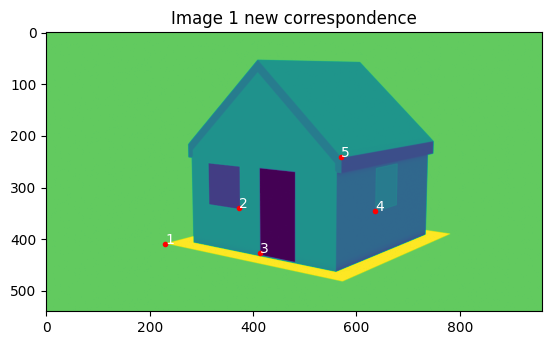

<Figure size 1300x1300 with 0 Axes>

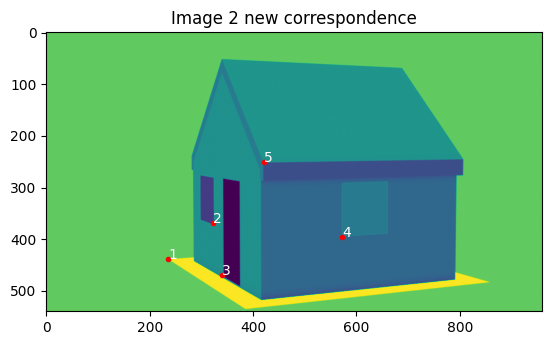

<Figure size 1300x1300 with 0 Axes>

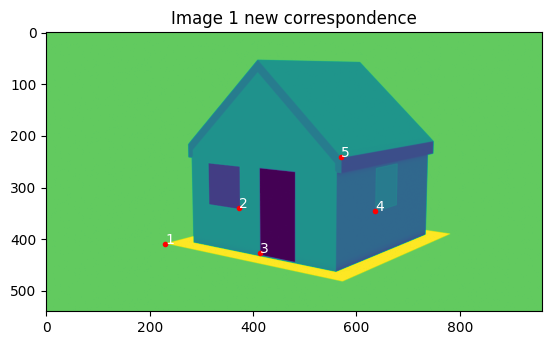

<Figure size 1300x1300 with 0 Axes>

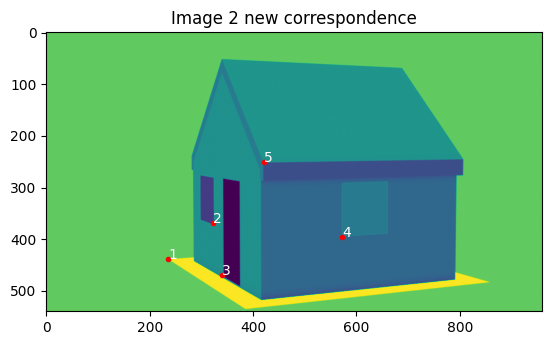

<Figure size 1300x1300 with 0 Axes>

In [26]:
Y_points1 = [[230, 410],
             [373, 340],
             [414, 427],
             [636, 345],
             [570, 240]]

plot_points(cv2.imread("house1.png", 0), Y_points1, "Image 1 new correspondence")

Y_points2 = [[236, 438],
             [323, 368],
             [340, 470],
             [572, 395],
             [422, 250]]

plot_points(cv2.imread("house2.png", 0), Y_points2, "Image 2 new correspondence")

In [30]:
# Handout 21 slide 25.
# GETTING THE REAL P AND P'
P_real = P_hat @ np.linalg.inv(H)
print("P correct:\n", P_real)

# Handout 21 slide 25.
P_real_prime = P_hat_prime @ np.linalg.inv(H)
print("P' correct\n", P_real_prime)

Y_world_points_real = []
for i in range(len(Y_points1)):
    p1 = Y_points1[i]
    p2 = Y_points2[i]
    estimated = linear_triangulation(p1,p2,P_real,P_real_prime)
    Y_world_points_real.append(estimated)

P correct:
 [[ -459.0328  -665.4225    46.5488 -2443.7306]
 [   11.9372   -25.9871   773.0405 -1899.1124]
 [    0.3101    -0.4363     0.0931    -4.7263]]
P' correct
 [[  2.6012  28.5849  -0.5011  74.9312]
 [ -3.6931   0.8858 -26.7752  64.6347]
 [ -0.0176   0.0083  -0.001    0.143 ]]


## Project Part 3. Results

In [35]:
print("F:\n",F, "\n")
print("\nP_hat: \n", P_hat, "\n")
print("P_hat_prime: \n", P_hat_prime, "\n")
print("Estimated 3D points X':")
_ = [print("point ", i + 1, "->",x) for i, x in enumerate(estimated_3D_points)]

print("\n--------------------------------------------------------------------")

print("\nP: \n", P_real, "\n")
print("P_prime: \n", P_real_prime, "\n")
print("Estimated 3D points Y:")
_= [print("point ", i + 1, "->",Y) for i, Y in enumerate(Y_world_points_real)]


F:
 [[ 0.      0.     -0.0057]
 [-0.     -0.      0.0372]
 [ 0.0072 -0.0344 -0.9987]] 


P_hat: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]] 

P_hat_prime: 
 [[-0.0011  0.0053  0.1525 -0.9883]
 [ 0.0072 -0.034  -0.987  -0.1527]
 [ 0.      0.     -0.0376 -0.    ]] 

Estimated 3D points X':
point  1 -> [24.6034 35.3947  0.0863  1.    ]
point  2 -> [33.9891 22.1956  0.0819  1.    ]
point  3 -> [37.6323 21.5827  0.0779  1.    ]
point  4 -> [29.2322  2.9815  0.0481  1.    ]
point  5 -> [32.3193  9.2657  0.0431  1.    ]
point  6 -> [42.3653 35.7348  0.0737  1.    ]
point  7 -> [36.624   5.36    0.0893  1.    ]
point  8 -> [33.7376 16.8201  0.0495  1.    ]
point  9 -> [25.6139 22.5737  0.0921  1.    ]
point  10 -> [31.1745 16.6272  0.0424  1.    ]

--------------------------------------------------------------------

P: 
 [[ -459.0328  -665.4225    46.5488 -2443.7306]
 [   11.9372   -25.9871   773.0405 -1899.1124]
 [    0.3101    -0.4363     0.0931    -4.7263]] 

P_prime: 
 [[  2.6012  28.